# Wine quality multiple regression analysis

## Import packages

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklern regression packages
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import (
    train_test_split,
    KFold,
    cross_val_score,
    cross_val_predict,
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn import metrics

# import functions from our python module in the functions.py script
# from functions import predict_metrics

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# uncomment lab_black if working in jupyter lab
# use nb_black if working in jupyter notebook
# %load_ext lab_black
# %load_ext lab_black
# %load_ext nb_black

In [3]:
# plt style
plt.style.use("seaborn")

<ipython-input-3-5d30bd470961>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## Load data

In [4]:
# define data path
data_output_path = "../data/winequality-white_clean.csv"

In [5]:
# access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# load and display data
data = pd.read_csv("/content/drive/MyDrive/data/winequality-white.csv", sep=";")
print(data.shape)
data.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data description

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Data preprocessing

In [8]:
# run a MLR using the holdout method on the wine dataset to predict the alcohol level

# splitting df columns for X and y
# X independent variables
X = data.iloc[:, :-2]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40


In [9]:
# y dependent variable "alcohol"
y = data.iloc[:, 10]
y.head()

0     8.8
1     9.5
2    10.1
3     9.9
4     9.9
Name: alcohol, dtype: float64

## Train-test split

In [10]:
# 10% of data as validation set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)

print(f"Set training has {X_train.shape[0]} samples.")
print(f"Set testing has {X_test.shape[0]} samples.")

Set training has 4408 samples.
Set testing has 490 samples.


## Multiple linear regression

### Holdout sampling method

In [11]:
# dataset is split into 2 sets: "train" and "test"
# "test" is used to see how the model performs on unseen data
# common split is 80% train 20% validation

In [12]:
# split the train in train/validation sets
X_train_hout, X_val_hout, y_train_hout, y_val_hout = train_test_split(
    X_train, y_train, test_size=0.2, random_state=21
)

### Feature scaling

In [13]:
# scale before fitting the model

# using StandardScaler feature scaling below
sc = StandardScaler()
X_train_hout_scaled = sc.fit_transform(X_train_hout)
X_val_hout_scaled = sc.transform(X_val_hout)

### Fit model

In [14]:
# linear regression model
lm = LinearRegression()
lm.fit(X_train_hout_scaled, y_train_hout)

# print fit results
print(f"Coefficients: {lm.coef_}")
print(f"Intercept: {lm.intercept_}")

Coefficients: [ 0.45389439  0.04932795  0.02886794  1.25200911  0.01477544 -0.0628956
  0.07325929 -2.15383465  0.36563295  0.11409808]
Intercept: 10.512228209491319


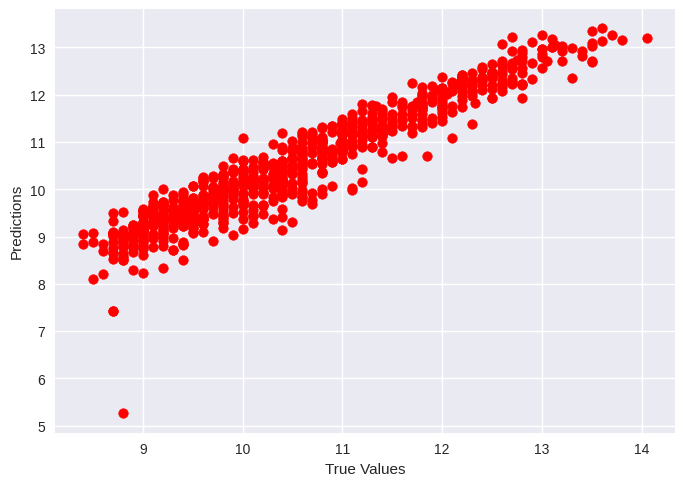

In [15]:
# predict
predictions = lm.predict(X_val_hout_scaled)

# display true values vs predictions
plt.scatter(y_val_hout, predictions, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
None

### Model performance

In [16]:
# model score
model_score = lm.score(X_val_hout_scaled, y_val_hout)
model_score

0.9079810562973298

In [17]:
# variable to print performance
def predict_metrics(y_test, predictions):
    print('MAE', metrics.mean_absolute_error(y_test, predictions))
    print('MSE', metrics.mean_squared_error(y_test, predictions))
    print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('Explained Var Score', metrics.explained_variance_score(y_test, predictions))

In [18]:
# print model performance
predict_metrics(y_val_hout, predictions)

MAE 0.2781577368365748
MSE 0.13915348864324706
RMSE 0.3730328251551692
Explained Var Score 0.9081166893930372


In [19]:
# check difference between actual and predicted y "alcohol" values
diff = y_val_hout - predictions
df = pd.DataFrame({"Actual": y_val_hout, "Predicted": predictions, "Difference": diff})
df.head()

,Actual,Predicted,Difference
4362,12.80,12.221164,0.578836
3763,11.50,11.306878,0.193122
2227,8.90,9.001407,-0.101407
4540,12.75,12.742029,0.007971
4470,11.30,11.604181,-0.304181


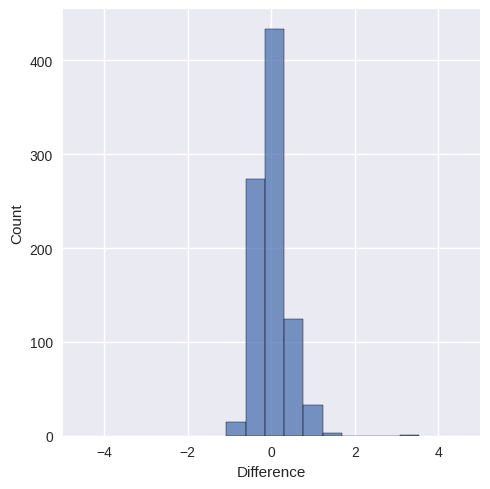

In [20]:
# plot differences
sns.displot(data=df, x="Difference", bins=10)
_ = plt.xlim(-5, 5)

In [21]:
# print beta coeffs for each feature
df_coeff = pd.DataFrame(
    {"Feature": data.columns.values[0:10], "Coefficients": lm.coef_}
)

df_coeff

,Feature,Coefficients
0,fixed acidity,0.453894
1,volatile acidity,0.049328
2,citric acid,0.028868
3,residual sugar,1.252009
4,chlorides,0.014775
5,free sulfur dioxide,-0.062896
6,total sulfur dioxide,0.073259
7,density,-2.153835
8,pH,0.365633
9,sulphates,0.114098


## Pipeline to allow scaling within cross-validation loop

In [22]:
# cross-validation is a resampling procedure used on a limited data sample
# k = n. groups to split the data into
# k = 3 = 3-fold cross-validation
# used to estimante ML model performance on unseen data
# results in less biased and less optimistic model estimate

1. Shuffle the dataset randomly
2. Split the dataset into k groups
3. For each unique group:
   - Take the group as a hold out or test data set
   - Take the remaining groups as a training data set
4. Fit a model on the training set and evaluate it on the test set
5. Retain the evaluation score and discard the model
6. Summarize the skill of the model using the sample of model evaluation scores

In [23]:
# pipeline feature scaling SS regression LR
sc = StandardScaler()
model = LinearRegression()

# create pipeline
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])

### Cross-validation

In [24]:
# create array for chosing samples from shuffle data
n = 50
k = 10
cv_scores = np.zeros([n, k])
cv_scores[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
# shuffle
for i in range(0, n):
  X_train_shuf, y_train_shuf = shuffle(X_train, y_train, random_state=i)
  cv_temp = cross_val_score(pipeline, X_train_shuf, y_train_shuf, cv=k, scoring="r2")
  cv_scores[i, :] = cv_temp

In [26]:
# cross-validation scores
cv_temp[:5]

array([0.91938628, 0.92024589, 0.93169241, 0.90365941, 0.91828957])

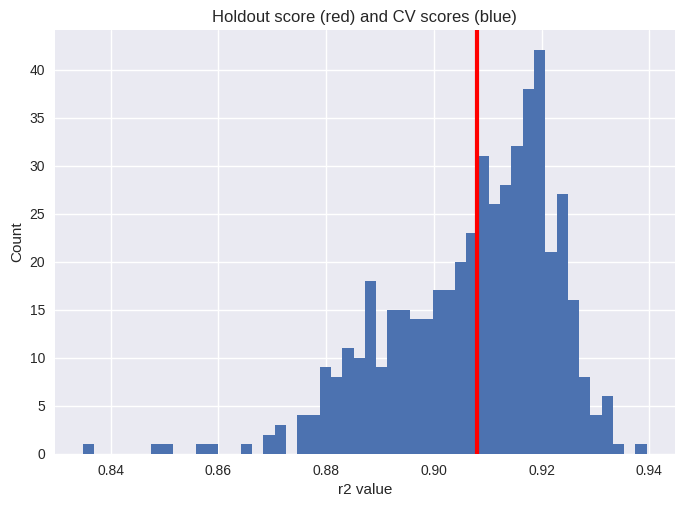

In [27]:
# plot r2 score for CV scores vs previously calculated holdout method score (red)
plt.hist(cv_scores.flatten(), 50)
plt.axvline(x=model_score, linewidth=3, color="r")
plt.title("Holdout score (red) and CV scores (blue)")
plt.xlabel("r2 value")
_ = plt.ylabel("Count")

### Outliers

In [28]:
# holdout score is within the CV scores (as if it was one ouf of many CV splits)
# seems like there are outliers (some CV run are lower than the rest)

# check CV scores
cv_scores.min(axis=1)

array([0.87962272, 0.88414052, 0.87997703, 0.88288649, 0.88631343,
       0.88389786, 0.88993518, 0.85135045, 0.88481727, 0.87182447,
       0.86893749, 0.88899803, 0.87614192, 0.88021033, 0.85829493,
       0.88314422, 0.88453002, 0.88146624, 0.89127014, 0.88739743,
       0.88742548, 0.88175525, 0.88510172, 0.87063007, 0.88766216,
       0.88016668, 0.88781907, 0.87911417, 0.88611947, 0.87202374,
       0.8758585 , 0.88556434, 0.88346372, 0.87041115, 0.88292055,
       0.88803078, 0.87989047, 0.88645937, 0.88749199, 0.8762983 ,
       0.86604416, 0.87777008, 0.89156573, 0.87952485, 0.87839697,
       0.88103358, 0.84857468, 0.88882673, 0.85703619, 0.83490612])

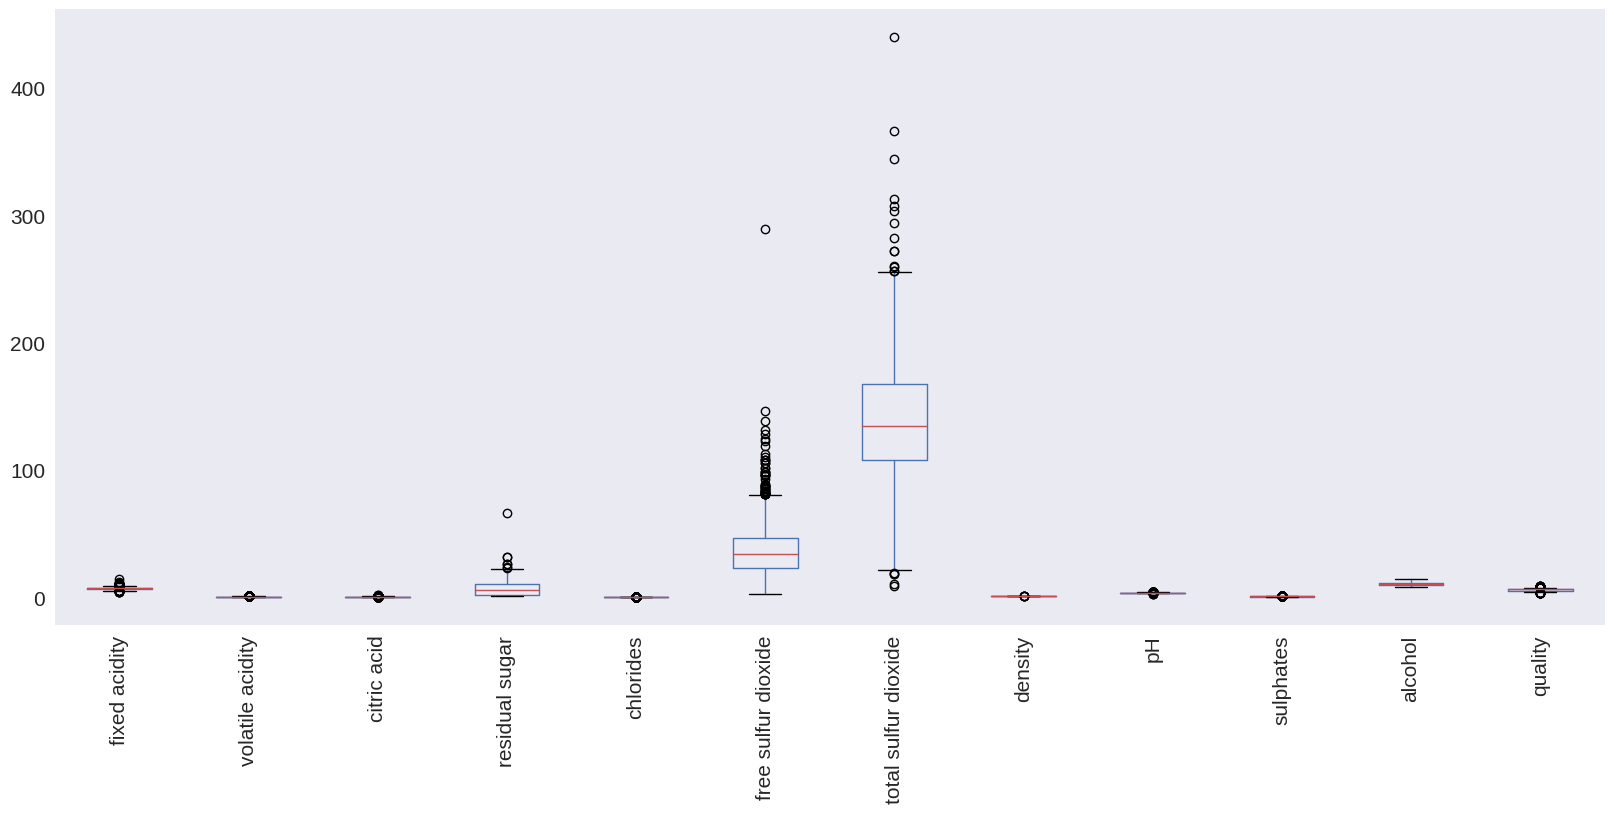

In [29]:
# original dataset boxplot
_ = data.boxplot(grid=False, rot=90, fontsize=15, figsize=(20, 8))

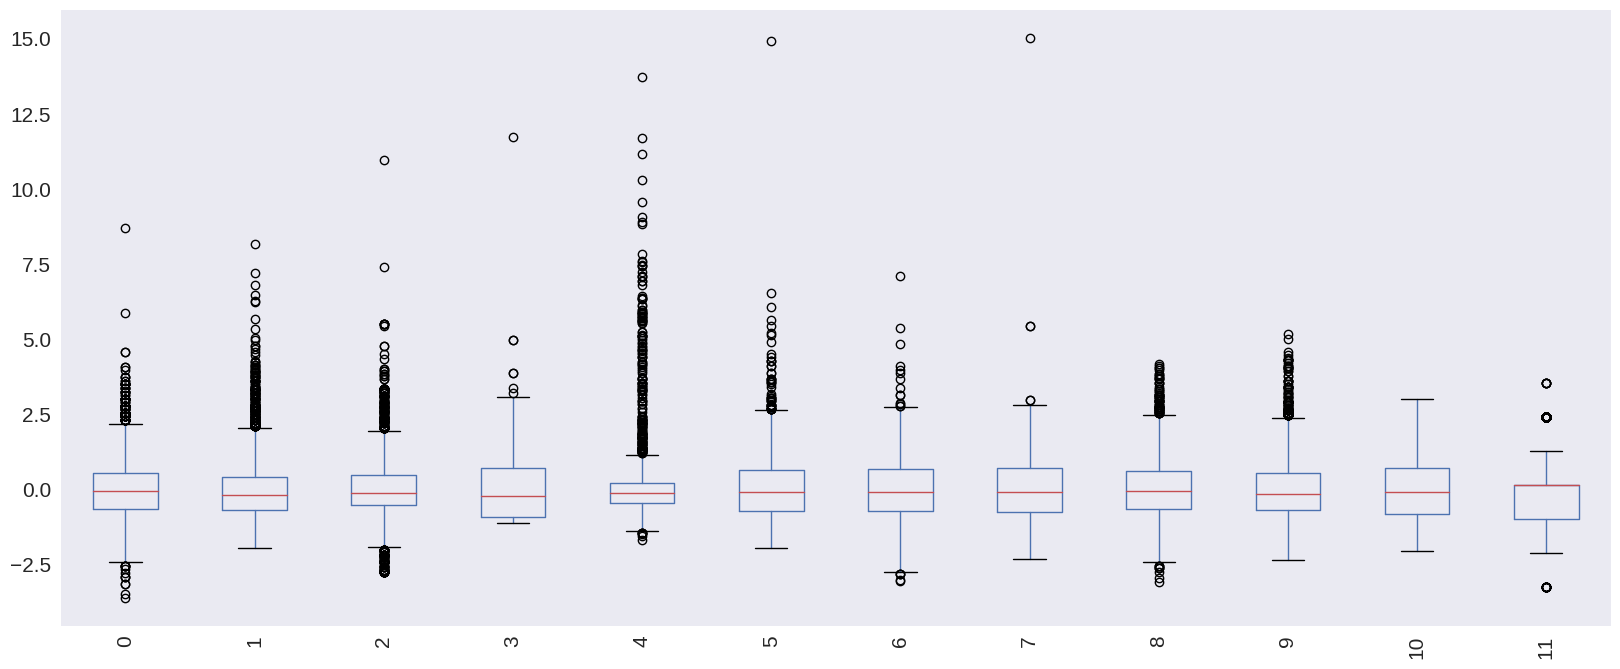

In [30]:
# scaling highlights outliers more clearly
# scaled boxplot
_ = pd.DataFrame(sc.fit_transform(data)).boxplot(
    grid=False, rot=90, fontsize=15, figsize=(20, 8)
)

Text(0, 0.5, 'Predictions')

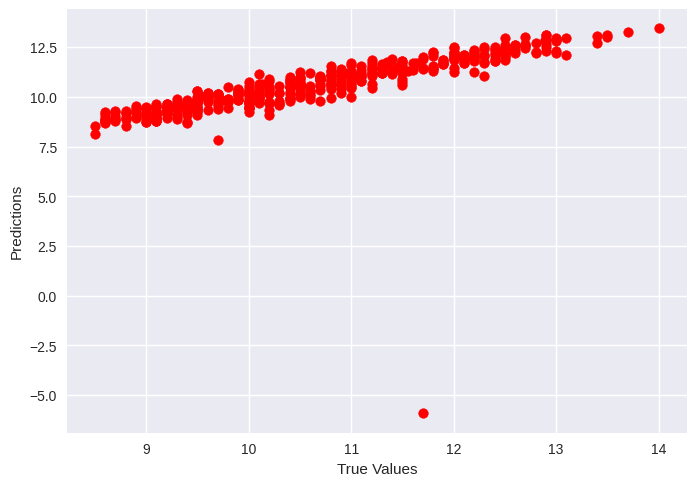

In [31]:
# pipeline fit
lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)

# plot true values vs predictions
plt.scatter(y_test, y_pred_all, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [32]:
# model performance
predict_metrics(y_test, y_pred_all)

MAE 0.32664876672323356
MSE 0.7702503021678846
RMSE 0.8776390500472757
Explained Var Score 0.5036427725071134


## Remove outliers

In [33]:
# cutoff Z-score value >=3
# Z-score = standard deviations from the mean
# Z-scire = 0 = data point score is identical to the mean score

In [34]:
# original data shape
print(data.shape)

(4898, 12)


In [35]:
# exclude all rows z-score >= 3
data_clean = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data_clean = data_clean.reset_index()
data_clean = data_clean.drop("index", axis=1)

# print new data shape and clean dataset
print(data_clean.shape)
data_clean.head()

(4487, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [36]:
# save clean dataframe into csv file for later use
data_clean.to_csv("winequality-white_clean.csv")

In [37]:
# data preprocessing y dependent and y independent dataset value
X = data_clean.iloc[:, :-2]
y = data_clean.iloc[:, 10]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40


In [38]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=19
)

# print train test sample size
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 4038 samples.
Testing set has 449 samples.


In [39]:
# create array for chosing samples from shuffle data
n = 50
k = 10
cv_scores = np.zeros([n, k])

# shuffle
for i in range(0, n):
    X_train_shuf, y_train_shuf = shuffle(X_train, y_train, random_state=i)
    cv_temp = cross_val_score(pipeline, X_train_shuf, y_train_shuf, cv=k, scoring="r2")
    cv_scores[i, :] = cv_temp

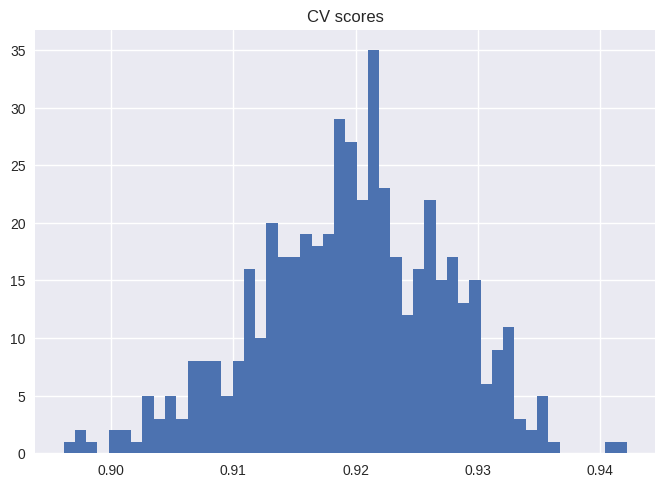

In [40]:
# plot CV scores removed outliers
plt.hist(cv_scores.flatten(), 50)
plt.title("CV scores")
None

In [41]:
# after removing the outliers, our model has more consistent predictions

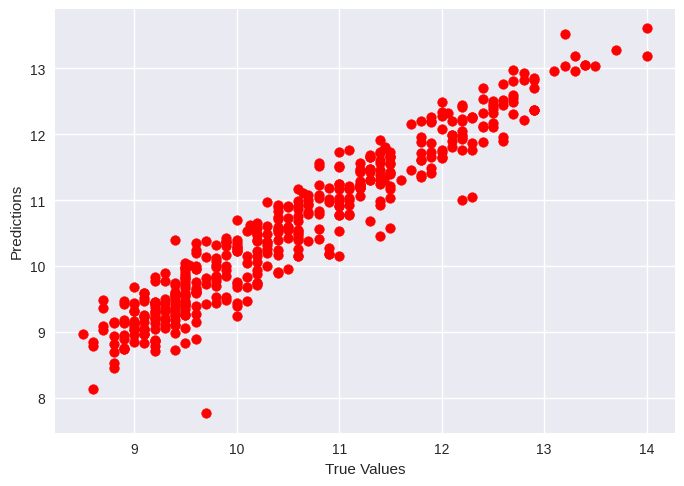

In [42]:
# fit model
lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)

# plot true values vs predictions
plt.scatter(y_test, y_pred_all, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
None

### Model performance

In [43]:
# model evaluation
predict_metrics(y_test, y_pred_all)

MAE 0.27369587586662675
MSE 0.12330666751735274
RMSE 0.3511504912674233
Explained Var Score 0.9186473104847065


In [44]:
# difference actual vs predicted alcohol level
diff = y_test - y_pred_all
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_all, "Difference": diff})
df.head()

,Actual,Predicted,Difference
2771,12.5,12.392450,0.107550
3021,11.5,11.661187,-0.161187
190,10.2,10.223133,-0.023133
1361,9.8,9.852516,-0.052516
1220,10.0,9.677437,0.322563


(-5.0, 5.0)

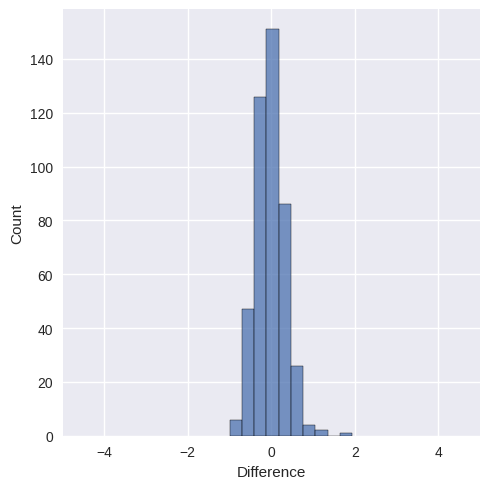

In [45]:
# plot differences
sns.displot(data=df, x="Difference", bins=10)
plt.xlim(-5, 5)

## K-fold validation function

Compared with standard k-fold

In [46]:
# validation function to compare w/ standard k-fold

# k-fold cross validation 5 splits
n_splits = 5

kf = KFold(n_splits=n_splits, random_state=None)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train_K, X_test_K = X.iloc[train_index], X.iloc[test_index]
    y_train_K, y_test_K = y.iloc[train_index], y.iloc[test_index]

    sc = StandardScaler()
    X_train_K = sc.fit_transform(X_train_K)
    X_test_K = sc.transform(X_test_K)

    model = LinearRegression()
    model.fit(X_train_K, y_train_K)

    predictions = model.predict(X_test_K)
    print("-----------------------------------------------------")
    predict_metrics(y_test_K, predictions)

# Show the results of the split
print("-----------------------------------------------------")
print(f"Training set has {X_train_K.shape[0]} samples.")
print(f"Testing set has {X_test_K.shape[0]} samples.")

-----------------------------------------------------
MAE 0.2910301559055263
MSE 0.13326062745649608
RMSE 0.3650488014724827
Explained Var Score 0.9041813304331783
-----------------------------------------------------
MAE 0.3169926811734147
MSE 0.1735463241172721
RMSE 0.41658891501967754
Explained Var Score 0.8858577214527675
-----------------------------------------------------
MAE 0.27506251614885546
MSE 0.12480655807056652
RMSE 0.3532797164720422
Explained Var Score 0.901826778769008
-----------------------------------------------------
MAE 0.25112194324118836
MSE 0.10108594081911298
RMSE 0.31794015288905075
Explained Var Score 0.9424693259827209
-----------------------------------------------------
MAE 0.2554130466168044
MSE 0.10884889395408401
RMSE 0.32992255751021937
Explained Var Score 0.930926878087041
-----------------------------------------------------
Training set has 3590 samples.
Testing set has 897 samples.


In [47]:
# K-fold average score
scores = cross_val_score(LinearRegression(), X, y, cv=kf)
accuracy = np.mean(scores)
print("Accuracy:", accuracy)

predictions = cross_val_predict(LinearRegression(), X, y, cv=kf)
print("MSE", metrics.mean_squared_error(y, predictions))

Accuracy: 0.9049544304555699
MSE 0.1283208539991282
